In [24]:
#Importation des librairies de Python nécessaires.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA

In [8]:
#Chargement des données
df1=pd.read_csv('Wholesale_customers_data.csv')

In [9]:
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
#Visualisation
df1.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
#la taille des données
df1.shape

(440, 8)

In [14]:
#Aléatoire
kmeans_random = KMeans(n_clusters=8, init='random', random_state=42)
kmeans_random.fit(df1)

C:\Users\achra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\achra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', random_state=42)

In [15]:
#Kmeans++
kmeans_plus = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_plus.fit(df1)

C:\Users\achra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\achra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [19]:
# Methode de Calinski-Harabasz index
ch_random = calinski_harabasz_score(df1, kmeans_random.labels_)
ch_plus = calinski_harabasz_score(df1, kmeans_plus.labels_)

print(f"Calinski-Harabasz Index (Random Initialization): {ch_random}")
print(f"Calinski-Harabasz Index (K-means++ Initialization): {ch_plus}")

Calinski-Harabasz Index (Random Initialization): 206.3129155433468
Calinski-Harabasz Index (K-means++ Initialization): 215.05783656648813


C:\Users\achra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\achra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\achra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\achra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

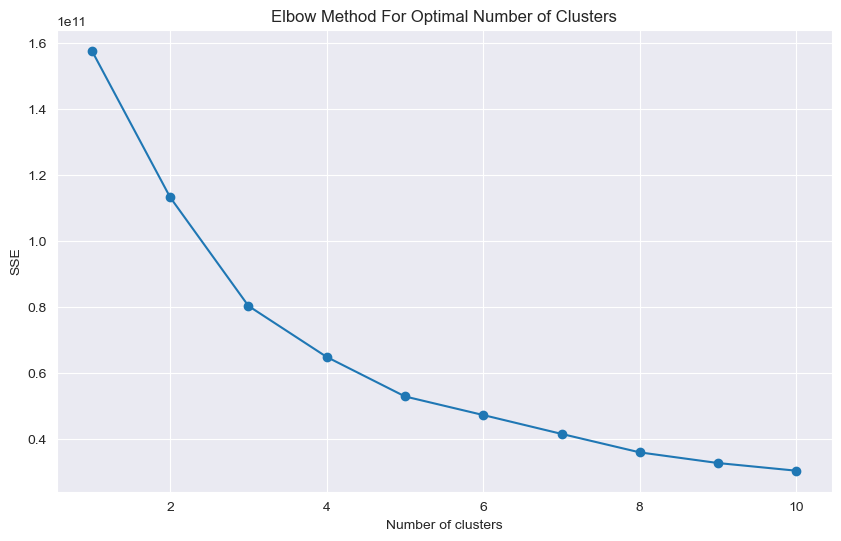

In [21]:
# Methode d' Elbow curve
def plot_elbow_method(df1):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df1)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.show()

plot_elbow_method(df1)

In [22]:
# Quel est le meilleur modèle de Clustering
best_model = kmeans_plus if ch_plus > ch_random else kmeans_random
print("Best model based on Calinski-Harabasz index:", "K-means++" if best_model == kmeans_plus else "Random")

Best model based on Calinski-Harabasz index: K-means++


In [23]:
#Représentation des données avec les poids des centres obtenus
centroids = best_model.cluster_centers_
print("Cluster centroids:\n", centroids)

Cluster centroids:
 [[1.16309013e+00 2.53218884e+00 6.38780687e+03 3.25556223e+03
  4.05656223e+03 2.58885837e+03 1.19933047e+03 9.99163090e+02]
 [1.00000000e+00 2.46153846e+00 5.64533077e+04 1.00262308e+04
  8.73900000e+03 1.55180769e+04 1.25823077e+03 7.17053846e+03]
 [1.21698113e+00 2.59433962e+00 2.37108491e+04 3.88205660e+03
  5.16931132e+03 3.77244340e+03 1.11826415e+03 1.69310377e+03]
 [1.91358025e+00 2.51851852e+00 4.99148148e+03 1.21405432e+04
  1.85055062e+04 1.59111111e+03 8.14824691e+03 1.82240741e+03]
 [2.00000000e+00 2.57142857e+00 2.00312857e+04 3.80840000e+04
  5.61261429e+04 2.56457143e+03 2.76445714e+04 2.54814286e+03]]


In [26]:
#L’analyse en composantes principales
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df1)

In [27]:
# a. Matrice observation 
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print("PCA Transformed Data:\n", pca_df.head())

PCA Transformed Data:
             PC1          PC2
0    650.022120  1585.519107
1  -4426.804984  4042.451521
2  -4841.998710  2578.762188
3    990.346444 -6279.806002
4  10657.998731 -2159.725789


In [30]:
# b. Les valeurs propres et les vecteurs propres associes aux axes principaux.
print("valeurs propres:", pca.explained_variance_)
print("vecteurs propres:\n", pca.components_)

valeurs propres: [1.64995904e+08 1.45452098e+08]
vecteurs propres:
 [[-4.20223371e-06  3.32885015e-06  9.76536846e-01  1.21184070e-01
   6.15403925e-02  1.52364619e-01 -7.05417374e-03  6.81047102e-02]
 [ 2.42933998e-05  5.75410266e-07 -1.10613856e-01  5.15802159e-01
   7.64606385e-01 -1.87234545e-02  3.65350762e-01  5.70792132e-02]]


In [32]:
# c. L’inertie de chaque axe.
print("L’inertie de chaque axe:", pca.explained_variance_)

L’inertie de chaque axe: [1.64995904e+08 1.45452098e+08]


In [33]:
# d. la somme des inerties de chaque axe égal la dimension de la base de données.
print("la somme des inerties de chaque axe :", np.sum(pca.explained_variance_))

la somme des inerties de chaque axe : 310448001.9168248


C:\Users\achra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


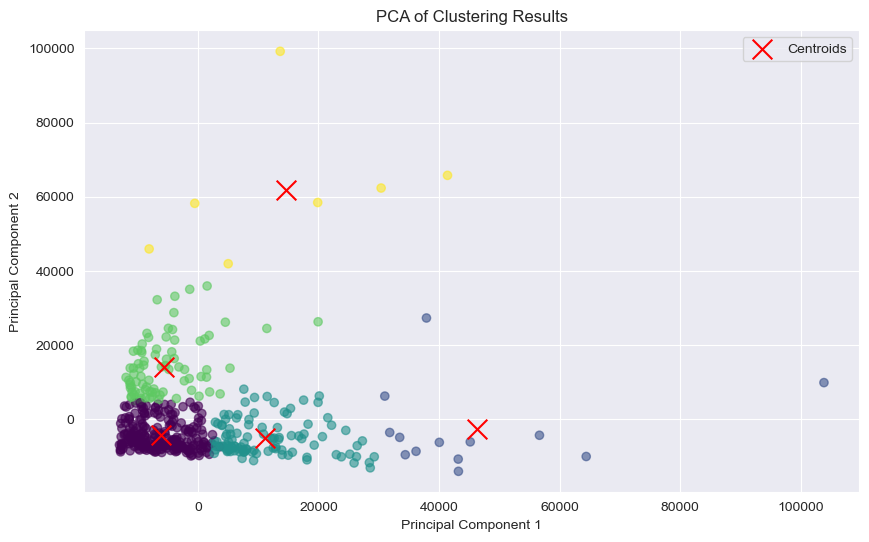

In [34]:
# e. Représentation les données ainsi que les centres obtenus par l’algorithme du k-meanssur les deux axes principaux.
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=best_model.labels_, cmap='viridis', marker='o', alpha=0.6)
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clustering Results')
plt.legend()
plt.show()

In [35]:
# f. Interprétations des résultats obtenus.
print("L’ACP montre les résultats du regroupement sur les deux premiers composants principaux. Les croix rouges indiquent les centroïdes des clusters")

L’ACP montre les résultats du regroupement sur les deux premiers composants principaux. Les croix rouges indiquent les centroïdes des clusters
